In [3]:
from paper_lib.data.cityscapes import CityscapesDataset

ds = CityscapesDataset(
    root="data/cityscapes",
    split="train",
    train_size=(1024, 1024),
    val_size=(1024, 2048),
    mean=(0.485, 0.456, 0.406),
    std=(0.229, 0.224, 0.225),
    ignore_index=255,
    bbox_format="pascal_voc",
    logger=None,
)

tensor(2470.3118)
tensor(16169.3105)
tensor(31042.0293)
tensor(2186.4155)
tensor([3, 1, 1, 2])


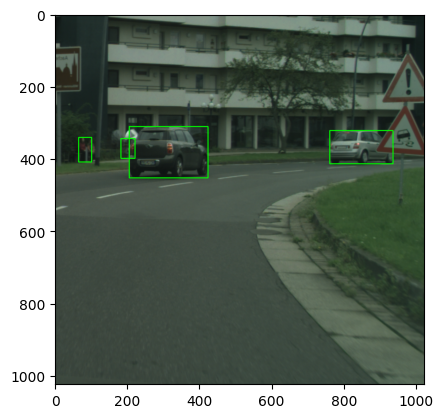

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

targets = ds[0]

image = targets["image"].numpy().transpose(1, 2, 0) * np.array(ds.std) + np.array(ds.mean)
image *= 255

image = image.astype(np.uint8)

for bbox in targets["bboxes"]:
    area = (bbox[3] - bbox[1]) * (bbox[2] - bbox[0])
    print(area)
    bbox = bbox.numpy().astype(np.int32)
    image = cv2.rectangle(image.copy(), (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
    # break

plt.imshow(image)
print(targets["labels"])

In [7]:
targets.keys()

dict_keys(['image', 'bboxes', 'labels', 'mask', 'info'])

In [8]:
targets["bboxes"], targets["labels"]

(tensor([[ 65.1034, 341.7600, 101.5172, 409.6000],
         [760.2759, 322.5600, 935.7241, 414.7200],
         [205.2414, 311.0400, 423.7242, 453.1200],
         [182.0690, 344.3200, 221.7931, 399.3600]]),
 tensor([3, 1, 1, 2]))